## Regression Machine Learning Case Study

In [1]:
# 1. CRIM: per capita crime rate by town
# 2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# 3. INDUS: proportion of non-retail business acres per town
# 4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# 5. NOX: nitric oxides concentration (parts per 10 million)
# 6. RM: average number of rooms per dwelling
# 7. AGE: proportion of owner-occupied units built prior to 1940
# 8. DIS: weighted distances to five Boston employment centers
# 9. RAD: index of accessibility to radial highways
# 10. TAX: full-value property-tax rate per $10,000
# 11. PTRATIO: pupil-teacher ratio by town
# 12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
# 13. LSTAT: % lower status of the population
# 14. MEDV: Median value of owner-occupied homes in $1000s


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

## Load dataset

In [11]:
# Load dataset
filename = "boston.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
            'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, names=names, header=0)

### Descriptive Statistics

In [12]:
# shape

print(dataset.shape)

(506, 14)


In [13]:
# types
print(dataset.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


#### Peek data

In [14]:
# head
print(dataset.head(10))

      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222     18.7  396.90   5.33  36.2
5  0.02985   0.0   2.18     0  0.458  ...  222     18.7  394.12   5.21  28.7
6  0.08829  12.5   7.87     0  0.524  ...  311     15.2  395.60  12.43  22.9
7  0.14455  12.5   7.87     0  0.524  ...  311     15.2  396.90  19.15  27.1
8  0.21124  12.5   7.87     0  0.524  ...  311     15.2  386.63  29.93  16.5
9  0.17004  12.5   7.87     0  0.524  ...  311     15.2  386.71  17.10  18.9

[10 rows x 14 columns]


In [16]:
# descriptions
pd.set_option('display.precision', 1)
print(dataset.describe())

          CRIM     ZN  INDUS     CHAS  ...  PTRATIO      B  LSTAT   MEDV
count  5.1e+02  506.0  506.0  5.1e+02  ...    506.0  506.0  506.0  506.0
mean   3.6e+00   11.4   11.1  6.9e-02  ...     18.5  356.7   12.7   22.5
std    8.6e+00   23.3    6.9  2.5e-01  ...      2.2   91.3    7.1    9.2
min    6.3e-03    0.0    0.5  0.0e+00  ...     12.6    0.3    1.7    5.0
25%    8.2e-02    0.0    5.2  0.0e+00  ...     17.4  375.4    6.9   17.0
50%    2.6e-01    0.0    9.7  0.0e+00  ...     19.1  391.4   11.4   21.2
75%    3.7e+00   12.5   18.1  0.0e+00  ...     20.2  396.2   17.0   25.0
max    8.9e+01  100.0   27.7  1.0e+00  ...     22.0  396.9   38.0   50.0

[8 rows x 14 columns]


In [19]:
# correlations
pd.set_option('display.precision', 2)
print(dataset.corr(method='pearson'))

         CRIM    ZN  INDUS      CHAS   NOX  ...   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42  ...  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  ... -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76  ...  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  ... -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00  ...  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  ... -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73  ...  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  ... -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61  ...  0.91     0.46 -0.44   0.49 -0.38
TAX      0.58 -0.31   0.72 -3.56e-02  0.67  ...  1.00     0.46 -0.44   0.54 -0.47
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19  ...  0.46     1.00 -0.18   0.37 -0.51
B       -0.39  0

## Data Visualizations

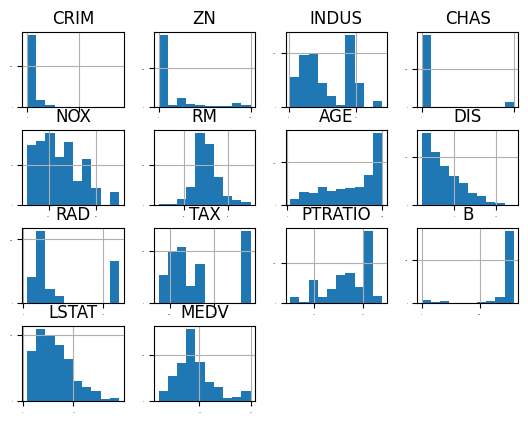

In [20]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

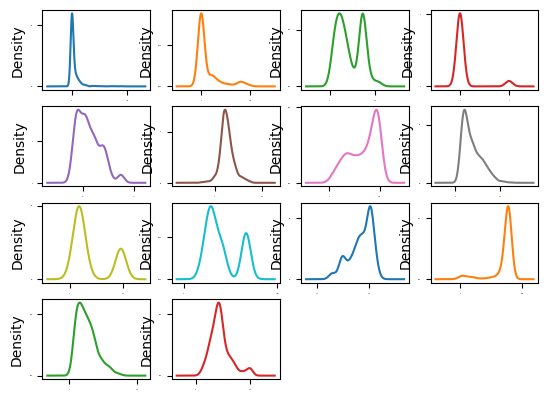

In [21]:
# density
dataset.plot(kind='density', subplots=True,
                layout=(4,4), sharex=False, legend=False,
fontsize=1)
plt.show()

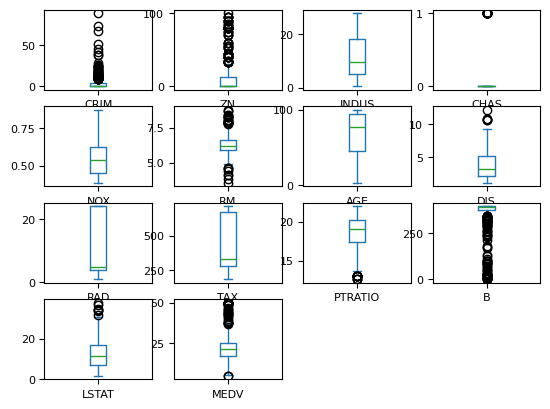

In [22]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(4,4), 
                sharex=False, sharey=False,
fontsize=8)
plt.show()

<Figure size 1200x1200 with 0 Axes>

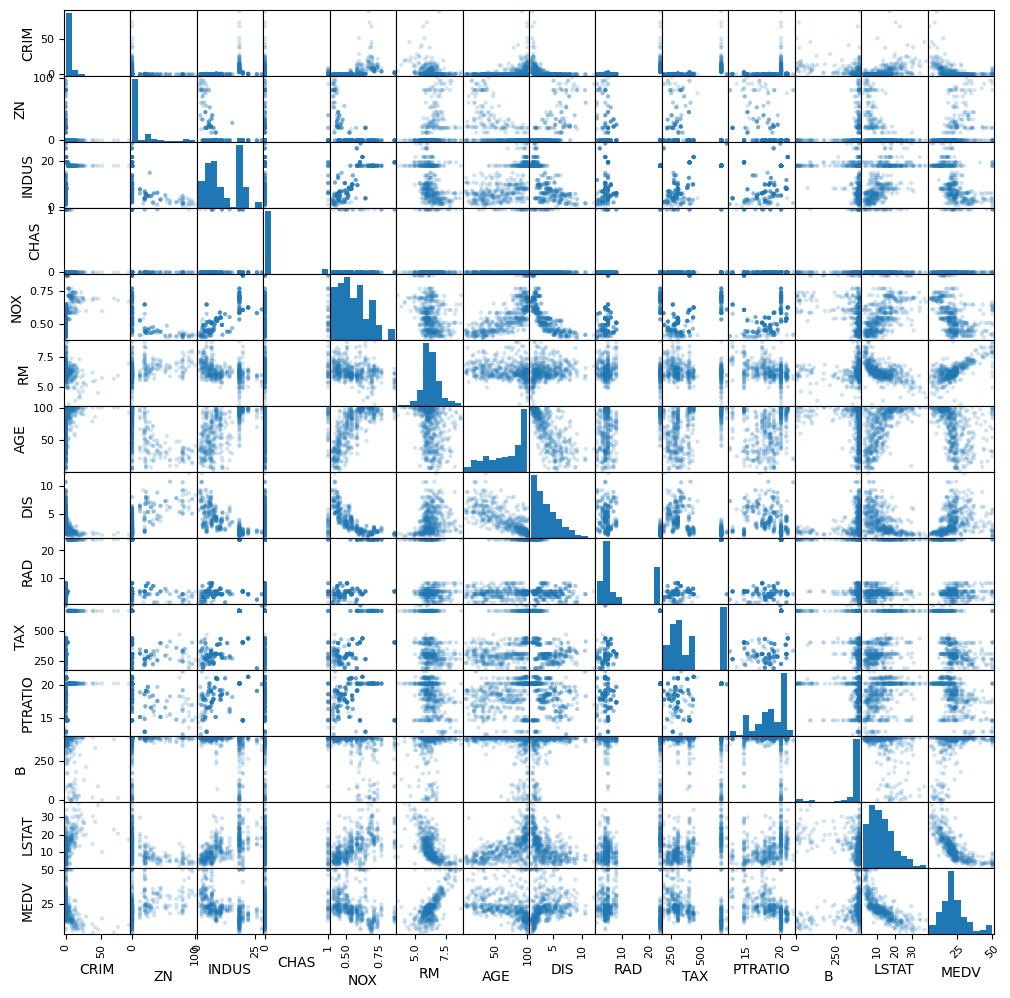

In [24]:
# scatter plot matrix

# Increase the figure size to prevent overlapping labels
plt.figure(figsize=(12, 12))

# Scatter plot matrix
scatter_matrix(dataset, alpha=0.2, figsize=(12, 12), diagonal='hist')

# Rotate x-axis labels and adjust
plt.xticks(rotation=45)

# Show the plot
plt.show()

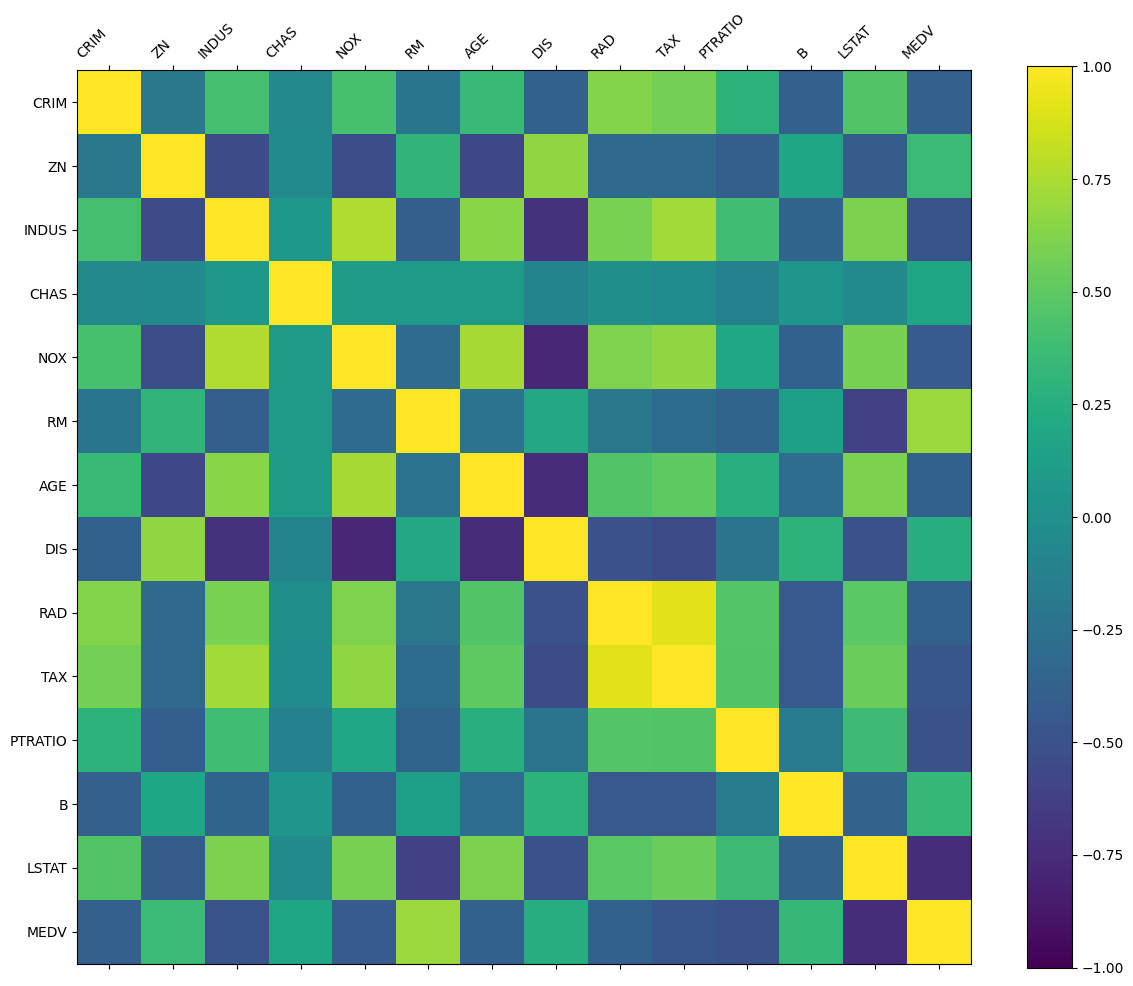

In [29]:
# Assuming you have your dataset and names defined

fig, ax = plt.subplots(figsize=(12, 10))  # Increase figure size

cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)

ticks = np.arange(0, len(names), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=45, ha='left')  # Rotate x-axis labels
ax.set_yticklabels(names)

# Adjust subplot layout
plt.subplots_adjust(bottom=0.15)

# Align x-axis labels to the tick marks
for label in ax.get_xticklabels():
    label.set_horizontalalignment('right')

plt.tight_layout()  # Adjust the layout
plt.show()

In [31]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:13]
Y = array[:,13]

validation_size = 0.20
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, 
                            test_size=validation_size, random_state=seed)

## Evaluate Algorithms

#### Mean Squared Error (MSE) will give a gross idea of how wrong all predictions are (0 is perfect).

In [32]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [33]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [36]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -22.006009 (12.188886)
LASSO: -27.105803 (13.165915)
EN: -27.923014 (13.156405)
KNN: -39.808936 (16.507968)
CART: -25.328479 (16.504143)
SVR: -67.824705 (32.801530)


##### It looks like LR has the lowest MSE, followed closely by CART.

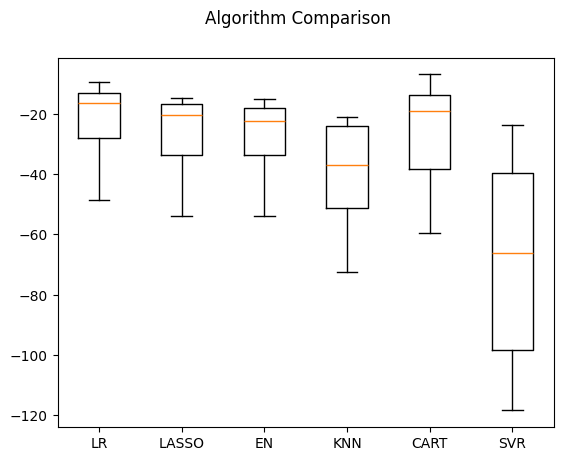

In [37]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', 
                Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', 
                Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', 
                Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', 
                Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', 
                Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', 
                Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg = f"{name} {cv_results.mean():.3f} ({cv_results.std():.3f})"
    print(msg)

ScaledLR -22.006 (12.189)
ScaledLASSO -27.206 (12.124)
ScaledEN -28.301 (13.609)
ScaledKNN -21.457 (15.016)
ScaledCART -24.883 (16.659)
ScaledSVR -29.570 (18.053)
